In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys_name = '/home/liujinde/data/home/liujinde/deep_wavafunction/ferminet-excited/experiment_data/N_5_2_ferminet_1'


files = os.listdir(sys_name)
ckpt_restore_filenames = []
for file in files:
    if 'ferminet_2023' in file and os.path.exists(sys_name+'/'+file+'/train_stats.csv'):
        ckpt_restore_filenames.append(sys_name+'/'+file+'/train_stats.csv')
ckpt_restore_filenames.sort()

E = []
T = []
Var = []
S = []
S_numpy = []
Verli = []
for file_name in ckpt_restore_filenames[:]:
    df = pd.read_csv(file_name)
    E.append(df['E_mean_clip'])
    T.append(df['delta_time'])
    Var.append(df['E_var_clip'])
    S.append(df[df.columns[13:]])
    S_numpy.append(df[df.columns[13:]].to_numpy())
    Verli.append((df['V']+df['V_loc']+df['V_nloc'])/df['T'])

Es = pd.DataFrame(E, index=[i for i in range(len(E))]).T
Es1 = pd.concat(E, axis=1).rolling(window=100, center=True, min_periods=1).mean()
T = pd.DataFrame(T, index=[i for i in range(len(T))]).T
E_baseline = Es1.loc[Es1.index[9999]].min()
Es -= E_baseline
Es1 -= E_baseline
# baselines = [0, 0.00376440, 0.11294485, 0.1505598, 0.1510656, 0.1584769, 0.1585051, 0.1712488]
# baselines = [0, 0.1001405, 0.10014335, 0.1001540, 0.193942461, 0.23729824, 0.24912833, 0.259175956, 0.26840219, 0.26840219, 0.26840386, 0.2719841, 0.2719904, 0.2719995]

pd.DataFrame(T, index=[i for i in range(len(T))]).T
E_vars = pd.DataFrame(Var, index=[i for i in range(len(Var))]).T
# pd.DataFrame(S, index=[i for i in range(len(S))]).T
Verlis = pd.DataFrame(Verli, index=[i for i in range(len(Verli))]).T

/tmp/ipykernel_604790/1350242288.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('Set3')


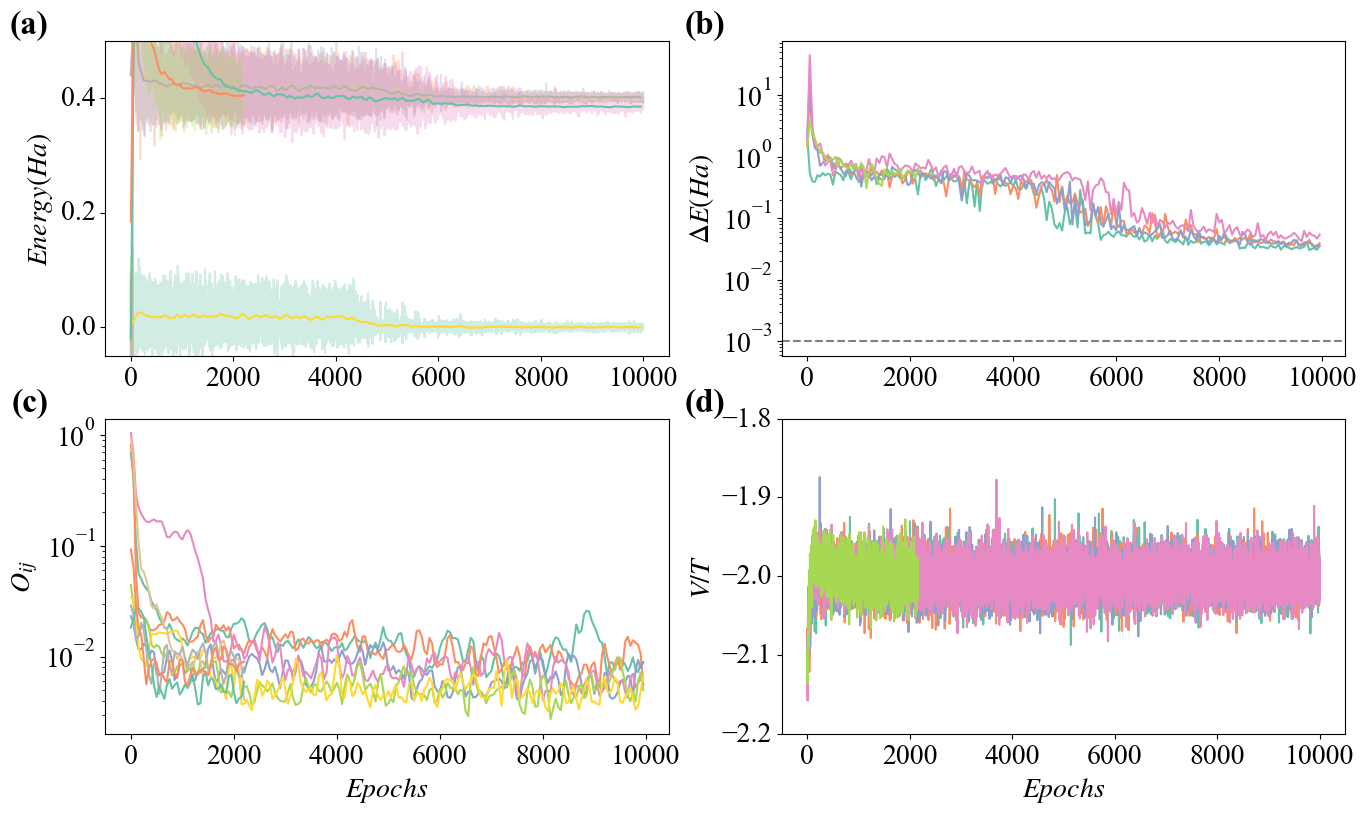

In [184]:
# 设置全局字体
plt.rc('font',family='Times New Roman')
# 设置斜体
# plt.rcParams['font.style'] = 'italic'
# 设置公式字体
plt.rcParams['mathtext.fontset'] = 'stix'
# 设置字体大小
plt.rcParams['font.size'] = 20
# 设置背景颜色
plt.rcParams['figure.facecolor'] = 'white'
# 设置背景网格
plt.rcParams['axes.grid'] = False
# 设置ylabel对齐方式为左对齐
plt.rcParams['ytick.alignment'] = 'center'
# 设置默认颜色
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap('Set2').colors)

# 设置图片大小
plt.figure(figsize=(16, 9))
# 设置colormap
cmap = mpl.cm.get_cmap('Set3')

plt.subplot(221)
plt.plot(Es.loc[::1].rolling(window=1, center=True, min_periods=1).mean(), alpha=0.3)
plt.plot(Es1.loc[::50], alpha=1)
plt.ylim(-0.05,0.5)
# plt.xlabel('Epochs')
plt.ylabel('$Energy (Ha)$')
# plt.ylim(-2.05,-1.8)
#在左上角添加(a),(b)..
plt.text(-0.1, 1.1, '({})'.format(chr(97+0)), transform=plt.gca().transAxes,
        fontsize='large', fontweight='bold', va='top', ha='right')
baselines=[]
for baseline in baselines:
    # 设置灰色虚线,线宽设置为0.1
    plt.axhline(y=baseline, color='gray', linestyle='--', linewidth=0.3)


plt.subplot(222)
plt.plot(E_vars.loc[::50].rolling(window=1, center=True, min_periods=1).mean(), alpha=1)
plt.yscale("log")
# plt.xlabel('Epochs')
plt.ylabel('$\Delta E (Ha)$')
plt.text(-0.1, 1.1, '({})'.format(chr(97+1)), transform=plt.gca().transAxes,
        fontsize='large', fontweight='bold', va='top', ha='right')
plt.axhline(y=0.001, color='gray', linestyle='--')

plt.subplot(223)
# for s in S:
S_line = pd.concat(S, axis=1)
plt.plot(S_line.rolling(window=100, center=True, min_periods=1).mean().loc[::50], alpha=1)
plt.yscale("log")
plt.xlabel('$Epochs$')
plt.ylabel('$O_{ij}$')
plt.text(-0.1, 1.1, '({})'.format(chr(97+2)), transform=plt.gca().transAxes,
        fontsize='large', fontweight='bold', va='top', ha='right')

plt.subplot(224)
# 按对数显示
plt.plot(Verlis.loc[::1].rolling(window=1, center=True, min_periods=1).mean(), alpha=1)
plt.xlabel('$Epochs$')
plt.ylabel('$V/T$')
plt.ylim(-2.2,-1.8)
plt.text(-0.1, 1.1, '({})'.format(chr(97+3)), transform=plt.gca().transAxes,
        fontsize='large', fontweight='bold', va='top', ha='right')
# 保存图片
plt.savefig('cerve.pdf', dpi=600, bbox_inches='tight')
# plt.show()

# 体现重叠矩阵的优化过程

/tmp/ipykernel_604790/1002198215.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('Blues')


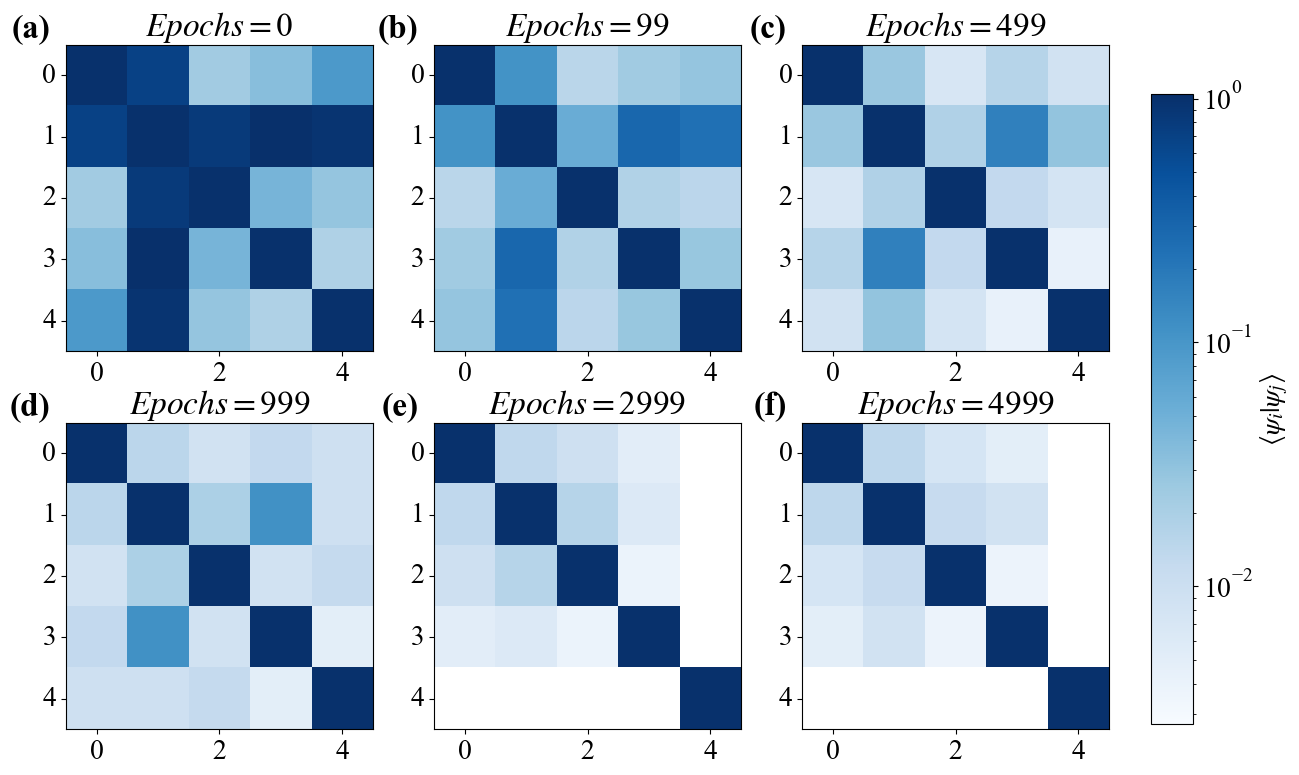

In [185]:
Ss = []
Si = [0,99,499,999,2999,4999]
S_matrix = np.zeros((len(S),len(S),10000))
# for k in range(6):
# S_matrix = np.zeros((len(S),len(S)))
for i in range(1, len(S)):
    s = S[i].rolling(window=100, center=True, min_periods=1).mean()
    for j in range(i):
        S_matrix[i,j,0:s.shape[0]] = s[s.columns[j-1]]
    # Ss.append(S_matrix.T+S_matrix+np.tile(np.eye(len(S)))
Ss = S_matrix.swapaxes(0,1) + S_matrix+np.tile(np.eye(len(S))[..., None], 10000)

plt.figure(figsize=(14, 9))
# 循环画出Ss
cmap = mpl.cm.get_cmap('Blues')
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(Ss[:,:,Si[i]], norm=mpl.colors.LogNorm(vmin=Ss[Ss!=0].min(), vmax=Ss.max()), cmap=cmap, alpha=1)
    plt.title('$Epochs = $'+str(Si[i]))
    #在左上角添加(a),(b)..
    plt.text(-0.05, 1.1, '({})'.format(chr(97+i)), transform=plt.gca().transAxes,
            fontsize='large', fontweight='bold', va='top', ha='right')
# 共享colorbar
plt.subplots_adjust(right=0.87)
cax = plt.axes([0.9, 0.12, 0.03, 0.7])
cb = plt.colorbar(cax=cax)
cb.set_label(r'$\langle\psi_i|\psi_j\rangle$')
# 保存图片
# plt.savefig('overlap.pdf', dpi=600, bbox_inches='tight')
plt.show()

0.04020737429565038
0.16145548617756128


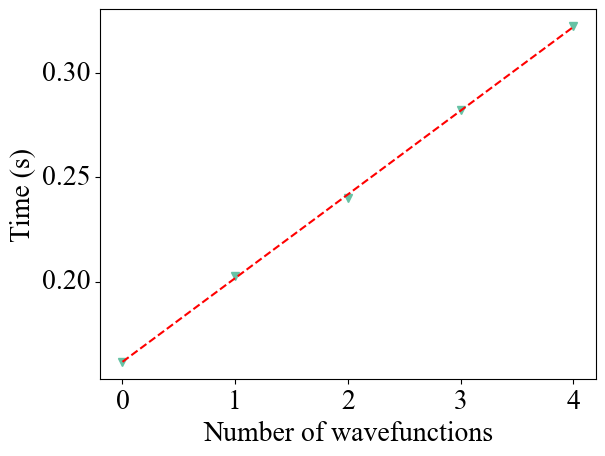

In [186]:
import numpy as np

y = T.loc[1:].mean()
x = np.linspace(0,len(y)-1,len(y))
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x,y,'v')
plt.plot(x, slope*x+intercept, 'r--')
plt.xlabel('Number of wavefunctions')
plt.ylabel('Time (s)')

print(slope)
print(intercept)


In [187]:
Es1

,E_mean_clip,E_mean_clip,E_mean_clip,E_mean_clip,E_mean_clip
0,0.005022,0.532116,0.439506,-0.021087,0.184178
1,0.004306,0.536270,0.454189,-0.003903,0.191958
2,0.005823,0.540830,0.466112,0.017681,0.199950
3,0.005474,0.542666,0.477609,0.038475,0.207159
4,0.005938,0.546096,0.486754,0.061585,0.213536
...,...,...,...,...,...
9995,-0.000056,0.400939,0.400671,0.385259,NaN
9996,-0.000050,0.400853,0.400692,0.385396,NaN
9997,-0.000066,0.400797,0.400751,0.385401,NaN
9998,-0.000166,0.400759,0.400866,0.385571,NaN


# 波函数节面分析
## full 11D node绘制
### 
## 固定电子节面绘制
### 固定全部电子位点，选择其中一个电子坐标进行网格化计算
### 可视化该网格下波函数

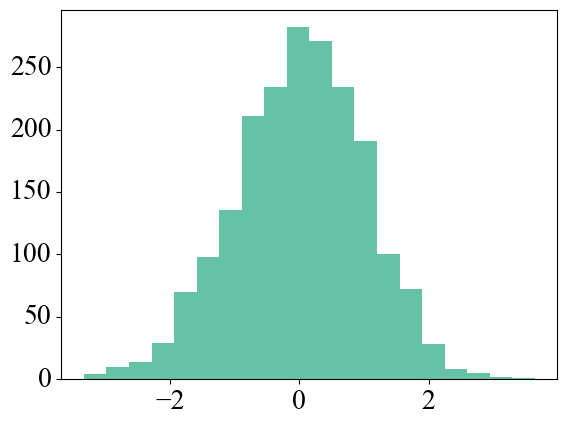

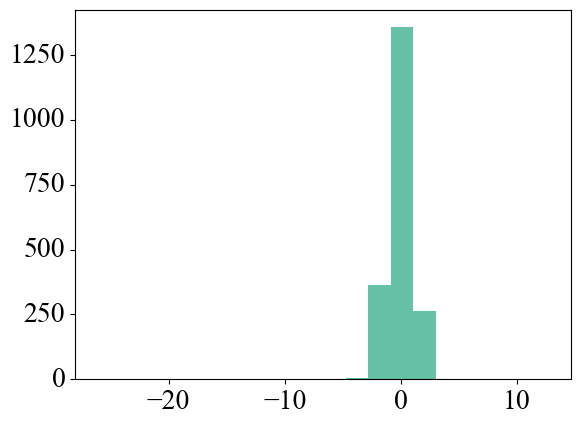

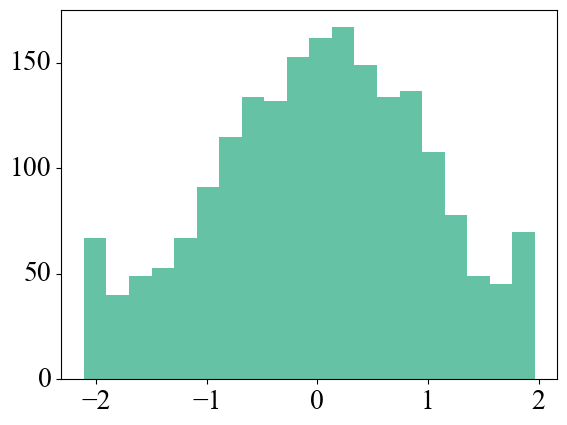

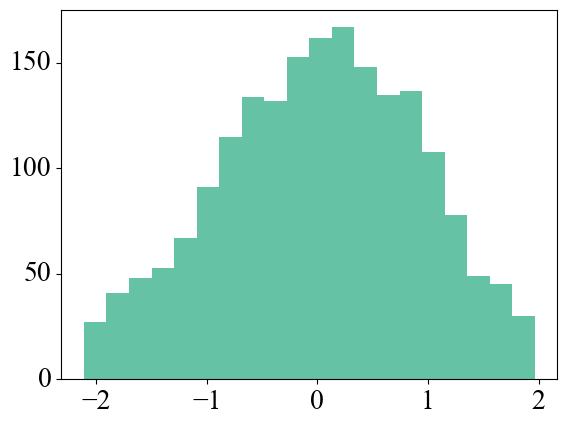

In [188]:
x = np.random.randn(2000)
plt.hist(x,bins=20)
plt.show()
x[np.random.randint(0, 2000, 10)] += np.random.randn(10)*10
plt.hist(x,bins=20)
plt.show()
a=np.percentile(x, [2, 98])
y = np.clip(x, a[0], a[1])
plt.hist(y,bins=20)
plt.show()
z=x[(x>a[0])&(x<a[1])]
plt.hist(z,bins=20)
plt.show()

(array([[2.000e+00, 1.100e+01, 3.800e+01, 8.100e+01, 1.640e+02, 3.580e+02,
         6.350e+02, 9.420e+02, 1.217e+03, 1.366e+03, 1.434e+03, 1.295e+03,
         9.670e+02, 6.880e+02, 4.160e+02, 2.290e+02, 1.080e+02, 3.200e+01,
         1.100e+01, 6.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 3.491e+03, 6.496e+03, 1.300e+01,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 3.502e+03, 6.485e+03, 1.300e+01,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00]]),
 array([-1.17428423, -1.05813811, -0.941992  , -0.82584589, -0.70969978,
        -0.59355367, -0.47740756, -0.36126145, -0.24511533, -0.12896922,
        -0.01282311,  0.103323  ,  0.21946911,  0.33561522,  0.45176133,
        

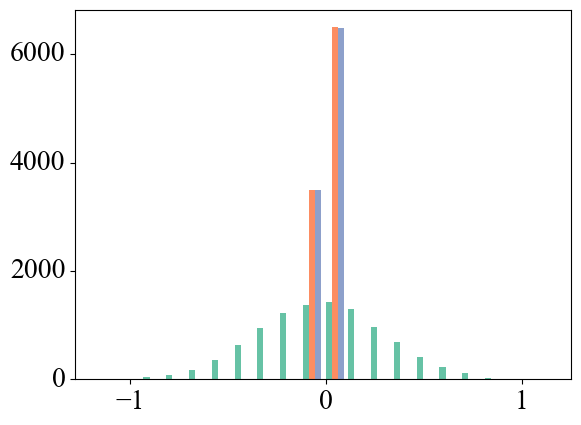

In [189]:
import numpy as np

y1 = []
y2 = []
y3 = []
for i in range(10000):
    #产生1000个随机数
    x = np.random.randn(1000)
    # 从x中任取5个数按高斯分布加噪声
    x[np.random.randint(0, 1000, 10)] += np.random.randn(10)*100
    # 取2，98的百分位数
    a=np.percentile(x, [2, 98])
    # 对x进行截断，小于a[0]的都等于a[0]，大于a[1]的都等于a[1]
    y = np.clip(x, a[0], a[1])
    z=x[(x>a[0])&(x<a[1])]
    y1.append([x.mean(), y.mean(), z.mean()])
plt.hist(np.array(y1), alpha=1, bins=20)

# Kr_ecp/Kr_ecp_clipped/Kr_ecp_clipped_excited

In [190]:
df = pd.read_csv('ferminet_Kr_36_ecp/train_stats.csv')
plt.plot(df['step'], df['energy'].rolling(window=100, center=True, min_periods=1).mean())
# df = pd.read_csv('ferminet_Kr_36_ecp_clipped/train_stats.csv')
# plt.plot(df['step'], df['E_mean'].rolling(window=100, center=True, min_periods=1).mean())
df = pd.read_csv('Kr_ecp/ferminet_2023_09_20_11:12:24/train_stats.csv')
plt.plot(df['step'], df['E_mean'].rolling(window=100, center=True, min_periods=1).mean())
plt.ylim(-18.6,-18.3)

FileNotFoundError: [Errno 2] No such file or directory: 'ferminet_Kr_36_ecp/train_stats.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the csv file
#df = pd.read_csv('ferminet_2023_08_13_04:43:56/train_stats.csv')
# plot energy
plt.plot(df['step'], df['energy'])
# plt.ylim(-1264,-1261)
plt.xlabel('step')
plt.ylabel('energy')
plt.title('energy')
plt.show()
# 对energy进行平滑处理并绘图
y1 = df['ewmean'].rolling(window=100, center=True, min_periods=1).mean()
y2 = df2['ewmean'].rolling(window=100, center=True, min_periods=1).mean()
plt.plot(df['step'], y1, label='Fe26')
plt.plot(df['step'], y2, label='Fe25')
# plt.ylim(-1264,-1261)
plt.ylim(-123.3,-122)
plt.xlabel('step')
plt.ylabel('energy')
plt.title('energy')
plt.show()
# plot ewmean
plt.plot(df['step'], df['ewmean'])
# plt.ylim(-1264,-1261)
plt.xlabel('step')
plt.ylabel('ewmean')
plt.title('ewmean')
plt.show()
# 以对数形式plot ewvar
plt.plot(df['step'], df['ewvar'])
plt.yscale('log')
plt.xlabel('step')
plt.ylabel('ewvar')
plt.title('ewvar')
plt.show()
# plot pmove
plt.plot(df['step'], df['pmove'])
plt.xlabel('step')
plt.ylabel('pmove')
plt.title('pmove')
plt.show()

In [ ]:
df = pd.read_csv('dmc_ckpt/__workspace/__metric.csv')

In [ ]:
#!/usr/bin/env python

'''
SCF module currently does not apply SO-ECP automatically. SO-ECP contributions
can be added to GHF/GKS core Hamiltonian by overwriding the method get_hcore.
Since pyscf-2.0 setting attribte with_soc in GHF object can include the
ECP-SOC integrals in core Hamiltonian.

See also examples/gto/20-soc_ecp.py
'''

import numpy
from pyscf import gto, lib, fci

mol = gto.M(
    verbose = 4,
    atom = 'Fe 0 0 0',
    basis = {'Fe': 'crenbl'},
    ecp = {'Fe': 'crenbl'}
)

#
# Adding ECP-SOC contribution to GHF Hamiltonian
#
myhf = mol.RHF().run()
cisolver = fci.FCI(myhf)
cisolver.kernel()

mf = mol.GHF()
s = .5 * lib.PauliMatrices
# ECPso evaluates SO-ECP integrals
#       <i| 1j * l U(r)|j>
# Note to the phase factor -1j to remove the phase 1j above when adding to
# core Hamiltonian
ecpso = -1j * lib.einsum('sxy,spq->xpyq', s, mol.intor('ECPso'))
hcore = mf.get_hcore()
hcore = hcore + ecpso.reshape(hcore.shape)
mf.get_hcore = lambda *args: hcore
mf.kernel()

#
# Since pyscf-2.0 ECP-SOC can be enabled in GHF object
#
mf = mol.GHF()
mf.with_soc = True
mf.kernel()